<a href="https://colab.research.google.com/github/licciard/fun-stuff/blob/main/math/etas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import mpmath as mp
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math
import scipy.special as scp

#mp.dps = 15; mp.pretty = True

%matplotlib inline

In [ ]:
def test_eta(k,u,d):
  tot = 0.
  for h in range(1,k+1):
    tot += ((np.exp(u)*h)**(k-h)) * np.exp(-d*h) / (h*np.math.factorial(k-h))
  return k*tot

def eta_eps(k,eps,ue,de,islog=True):
  tot = 0.
  for h in range(1,k+1):
    tot += scp.binom(k,h)*(h**(k-h-1))*((np.e*((k-h)**(2*eps)))**(ue*(k-h)))*np.exp(-de*h)
  if islog:
    return np.log(tot)-scp.gammaln(k)
  return tot/scp.gamma(k)

def sum_eta_eps(n,eps,ue,de):
  tot = 0.
  for j in range(1,n):
    tot += scp.binom(n,j)*eta_eps(j,eps,ue,de,False)
  return tot

In [ ]:
# 1.15889217   1.07490014 -19.24698245
# 1.41087151   1.04951008 -56.90396208
# 1.34996908 1.05414643
# 1.56639292 1.03866942

epst = 0.0389 #0.07
uet = 1.566 #0.9
det = 18 #10

for k in range(1,100):
  print("eta_eps({}) = {}".format(k-1,eta_eps(k,epst,uet,det,False)))
  #print("sum_eta_eps({}) = {}".format(k,sum_eta_eps(k,epst,uet,det)))
  #print("eta({}) = {}".format(k,test_eta(k+1,1.7,10)))

eta_eps(0) = 1.522997974471263e-08
eta_eps(1) = 1.4582583786356252e-07
eta_eps(2) = 6.19944429367428e-07
eta_eps(3) = 1.6646136972028461e-06
eta_eps(4) = 3.2755645775208933e-06
eta_eps(5) = 5.104926542487019e-06
eta_eps(6) = 6.6058891349325065e-06
eta_eps(7) = 7.325401799060335e-06
eta_eps(8) = 7.12008420132663e-06
eta_eps(9) = 6.169113652729969e-06
eta_eps(10) = 4.827583060393924e-06
eta_eps(11) = 3.4477895590033095e-06
eta_eps(12) = 2.2664971331733973e-06
eta_eps(13) = 1.3811725204844002e-06
eta_eps(14) = 7.849028632332234e-07
eta_eps(15) = 4.1810366828803947e-07
eta_eps(16) = 2.0969373643771343e-07
eta_eps(17) = 9.940964553866725e-08
eta_eps(18) = 4.4705324014311495e-08
eta_eps(19) = 1.91353270135739e-08
eta_eps(20) = 7.82237822805656e-09
eta_eps(21) = 3.0659193785264078e-09
eta_eps(22) = 1.1581339377258784e-09
eta_eps(23) = 4.2501150769891203e-10
eta_eps(24) = 1.5355002862487989e-10
eta_eps(25) = 5.5819511134448033e-11
eta_eps(26) = 2.107908484701064e-11
eta_eps(27) = 8.56640331390

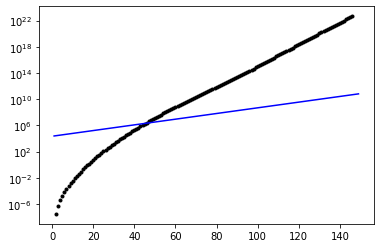

In [ ]:
dn = np.arange(1,150,1)
sn = np.array([sum_eta_eps(n,epst*1,1*uet,1*det) for n in dn])
en = np.array([np.exp(0.1*n+10) for n in dn])
plt.plot(dn, sn, 'k.')
plt.plot(dn, en, 'b-')
#plt.xscale('log')
plt.yscale('log')
plt.show()

[1.56639292 1.03866942]


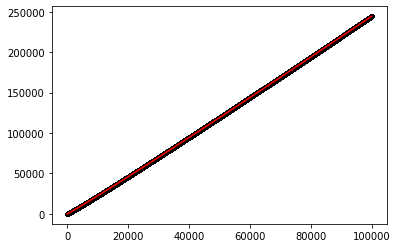

In [ ]:
def mypow(x, a, b):
  return a*(x**b) -15

dn = np.arange(5,100000,1)
mun = np.array([n*np.log(np.log(n))-4*np.log(10) for n in dn])
popt, pcov = opt.curve_fit(mypow,  dn,  mun,  p0=(1,2))
print(popt)

plt.plot(dn, mun, 'k.')
plt.plot(dn,mypow(dn,*popt),'r-')

#axes = plt.gca()
#axes.set_xlim([0,10])
#axes.set_ylim([-50,0])
plt.show()